# **Notebook Created by : Priyanka Diddi**

# Prediction using Unsupervised ML : Iris Flower Classification

## 1. Business Problem

### 1.1 Description

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper. Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### 1.2 Problem Statement

Given Sepal and Petal feattures, predict the class of Iris flower.

### 1.3 Source / useful links
This problem statement and data given by The Sparks Foundation.

link : https://bit.ly/3kXTdox

### 1.4 Real World / Business Objectives and Constraints
1) Here objective is to predict class of iris flower by posing this problem as unsupervised Learning Problem.

2) No strict latency constraints.

# 2. Machine Learning problem
## 2.1 Data
### 2.1.1 Data Overview

The dataset has 150 rows.

Size of dataset is 5 KB

### Data Field Explaination


- SepalLengthCm : Sepal length in centimeters.
- SepalWidthCm: Sepal width in centimeters.
- PetalLengthCm: Petal length in centimeters.
- PetalWidthCm: Petal width in centimeters.
- Species: Iris Setosa, Versicolor, or Virginica.


### 2.1.2 Example Data point

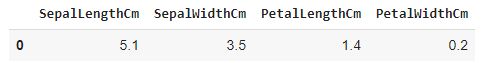

##2.2 Mapping the real-world problem to a Machine Learning Problem
### 2.2.1 Type of Machine Learning Problem
This is a multiclass classification problem.

### 2.2.2 Performance metric

Adjusted rand index (ARI) : The ARI uses true cluster assignments to measure the similarity between true and predicted labels.

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

## 3. Exploratory Data Analysis
### 3.1 Data Loading

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
actual_y=data['Species']

x=data.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Kernel Density Estimation plot

Average of SepalLengthCm feature :  5.84 
Average of SepalWidthCm feature :  3.05 
Average of PetalLengthCm feature :  3.76 
Average of PetalWidthCm feature :  1.2 


Text(0, 0.5, 'Density')

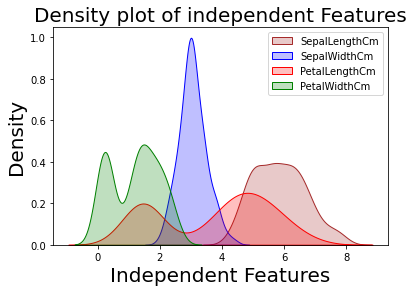

In [7]:
col=['brown','blue','red','green']

for i,feature in enumerate(x.columns):
  res = sns.kdeplot(x[feature],color=col[i],shade=True,label=feature)
  print("Average of {0} feature :  {1} ".format(feature, round(x[feature].mean(),2)))

plt.legend()
plt.title('Density plot of independent Features',size=20)  
plt.xlabel('Independent Features',size=20)
plt.ylabel('Density',size=20)

**Observation**: 

1) 'SepalLengthCm' Feature: In this feature most of the values are from 4cm to 8cm and it has wide distribution curve which somehow looks right skewed distribution.

2) 'SepalWidthCm' Feature: In this feature most of the values are from 2cm to 4cm and it has very peaked distribution curve.

3) 'PetalLengthCm' Feature: In this feature most of the values are from 1 cm to 6cm and it has left skewed distribution.

4) 'PetalWidthCm' Feature: In this feature most of the values are from 0.1cm to 2.5cm also it has left skewed distribution.

# To find optimum number of clusters : elbow method

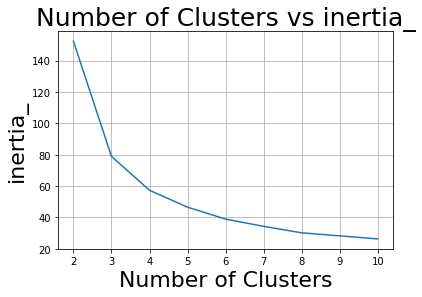

In [8]:
from sklearn.cluster import KMeans
#Here inertia means Sum of squared distances of samples to their closest cluster center.
number_of_clusters=[2,3,4,5,6,7,8,10]
inertia=[]
for i in number_of_clusters:
  kmeans=KMeans(n_clusters=i).fit(x)
  inertia.append(kmeans.inertia_)

plt.plot(number_of_clusters,inertia)
plt.xlabel('Number of Clusters',size=22)
plt.ylabel('inertia_',size=22)
plt.title('Number of Clusters vs inertia_',size=25)
plt.grid()
plt.show()

**Observation**: From above plot, the optimum clusters is where the elbow occurs so cluster size=3 is better fit to the data.

# Fit the model

In [9]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# add these predicted y's as column to our dataframe
x['predicted_y']=y_kmeans

In [10]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
y_mapping={1:'Setosa',2:'versicolour',0:'virginica'}

x['predicted_y']=x['predicted_y'].map(y_mapping)

In [12]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted_y
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### To represent clusters by plotting, first group datapoints into 3 categories namely Setosa,virginica,versicolour and to plot it on 2 dimensional space use only 2 features.

In [13]:
setosa = x.loc[x.predicted_y == 'Setosa',['SepalLengthCm','SepalWidthCm']]
virginica = x.loc[x.predicted_y == 'virginica',['SepalLengthCm','SepalWidthCm']]
versicolour = x.loc[x.predicted_y == 'versicolour',['SepalLengthCm','SepalWidthCm']]

### Scatter Plot

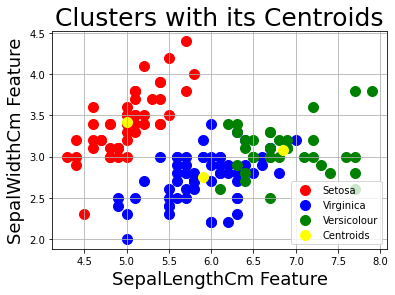

In [14]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], s = 100, c = 'red', label = 'Setosa')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], s = 100, c = 'blue', label = 'Virginica')
plt.scatter(versicolour['SepalLengthCm'], versicolour['SepalWidthCm'], s = 100, c = 'green', label = 'Versicolour')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.xlabel('SepalLengthCm Feature',size=18)
plt.ylabel('SepalWidthCm Feature',size=18)
plt.title('Clusters with its Centroids',size=25)
plt.grid()
plt.show()

# Performance Evaluation

In [15]:
ari_kmeans = adjusted_rand_score(actual_y, kmeans.labels_)

In [16]:
round(ari_kmeans, 2)

0.73

**Observation**: The adjusted rand score is 0.73 which is greater than 0 and near to 1 this indicates somehow perfectly labeled clusters.

## Conclusion:

1) At last ,the task was to represent cluster centroids with cluster datapoints so instead of using t-SNE here to reduce dimensionality of data we prefered to take only 2 features because if we had followed t-SNE approach then there is problem of representing centroids of clusters.

2) Using kmeans clustering, model got 0.73 as Adjusted rand index score which shows that model has assigned each datapoint to its correct clusters upto some level of accuracy.

